In [15]:
import pandas as pd
df=pd.read_csv("data/USA_Housing.csv")
print("Shape - ",df.shape)
print(df.head())

Shape -  (5000, 7)
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, 

In [16]:
X=df.drop(columns=['Price','Address']).values
y=df['Price'].values

print("Feature Shape - ",X.shape)
print("Target Shape - ",y.shape)

79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456#,1059033.5578701235

Feature Shape -  (5000, 5)
Target Shape -  (5000,)


(79545.45857431678,
 5.682861321615587,
 7.009188142792237,
 4.09,
 23086.800502686456)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

print("Training data - ",X_train.shape,y_train.shape)
print("Validation data - ",X_val.shape,y_val.shape)


Training data -  (4000, 5) (4000,)
Validation data -  (1000, 5) (1000,)


In [18]:
import numpy as np
X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)

X_train_norm=(X_train-X_mean)/X_std
X_val_norm=(X_val-X_mean)/X_std

print("First Normalized Row - ",X_train_norm[0])

First Normalized Row -  [-0.19049241 -0.12817719 -0.13160635  0.12038585 -0.82761782]


In [19]:
def compute_cost(x, y, w, b):
    m = x.shape[0]            # ✅ Use the passed dataset x
    y_hat = x.dot(w) + b      # ✅ Predict using x
    cost = (1/(2*m)) * np.sum((y_hat - y)**2)
    return cost


In [20]:
import numpy as np
n_features=X_train_norm.shape[1]
w=np.zeros(n_features)
b=0


In [21]:
learning_rate=0.03
iterations=500
m=X_train_norm.shape[0]
cost_history=[]

for i in range(iterations):
    y_hat=X_train_norm.dot(w)+b
    dw=(1/m)*X_train_norm.T.dot(y_hat-y_train)
    db=(1/m)*np.sum(y_hat-y_train)

    w=w-learning_rate*dw
    b=b-learning_rate*db

    cost=compute_cost(X_train_norm,y_train,w,b)
    cost_history.append(cost)

    if i%100==0:
        print(f"Iteration - {i},Cost - {cost:.2f}")

print("Trained weights - ",w)
print("Trained bias - ",b)

Iteration - 0,Cost - 770379421739.04
Iteration - 100,Cost - 6955278127.88
Iteration - 200,Cost - 5135895332.91
Iteration - 300,Cost - 5128318409.77
Iteration - 400,Cost - 5128165409.72
Trained weights -  [231740.37003054 163579.84500975 120703.41843633   3013.83033599
 152236.33496195]
Trained bias -  1229576.6935933642


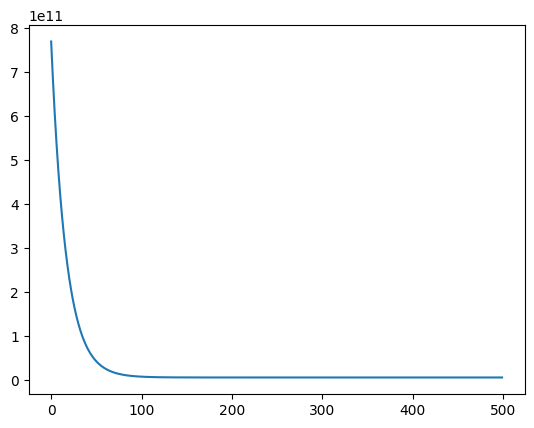

In [22]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()

In [28]:
y_val_pred=X_val_norm.dot(w)+b
mse=(1/(2*m))*np.mean((y_val-y_val_pred)**2)
print("Validation MSE - ",mse)

Validation MSE -  1261154.98496039


In [26]:
x_new=np.array([79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456])
x_new_norm=(x_new-X_mean)/X_std
y_new_pred=x_new_norm.dot(w)+b
print("Predicted price for new house - ",y_new_pred)

Predicted price for new house -  1224028.6667174501
